# Understand the Data

[Dataset](https://www.kaggle.com/datasets/rishabhbhartiya/taarak-mehta-ka-ooltah-chashmah-episode-dateset)

In [35]:
# type: ignore
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import warnings
warnings.filterwarnings('ignore')

In [36]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Blinkit_Retil_Analysis\blinkit_retail.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,Title,Price_discount,Price_original,Details,Tag,Date,Place
30178,Diary Of A Wimpy Kid - Box Of Books (Books 1 -...,"â¹ 2,399","â¹ 3,999",Jeff Kinney,NaN,20240119,Mumbai
33554,Moi Soi Soi Udon Flat Noodles + Soi Veg Long H...,â¹ 164,â¹ 198,150 g + 150 g,Out of Stock,20240121,Chennai
43356,Kimirica Madagascar Vanilla Winter Hand Cream ...,â¹399,NaN,30 ml,NaN,20240122,Bengaluru
85415,Lay's Spanish Tomato Tango Potato Chips,â¹20,NaN,40 g,NaN,20240128,Bengaluru
25303,Jivo Pomace Olive Oil,â¹ 450,"â¹ 1,049",1 l,NaN,20240119,Delhi
23395,Borges Extra Virgin Olive Oil,"â¹ 1,166","â¹ 2,000",1 l,NaN,20240119,Chennai
54748,Sponge Gourd (Tori),â¹58,â¹79,400 g - 500 g,NaN,20240123,Chennai


In [37]:
df.shape

(116554, 7)

In [38]:
df.size

815878

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116554 entries, 0 to 116553
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           116554 non-null  object
 1   Price_discount  116553 non-null  object
 2   Price_original  99047 non-null   object
 3   Details         88227 non-null   object
 4   Tag             10521 non-null   object
 5   Date            116554 non-null  int64 
 6   Place           116554 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.2+ MB


In [40]:
df.describe(include='all')

,Title,Price_discount,Price_original,Details,Tag,Date,Place
count,116554,116553,99047,88227,10521,1.165540e+05,116554
unique,2467,1691,1151,486,1,NaN,5
top,Kissan Fresh Tomato Ketchup,â¹99,â¹399,Wonder House Books Editorial Team,Out of Stock,NaN,Mumbai
freq,165,1364,1405,4674,10521,NaN,23623
mean,NaN,NaN,NaN,NaN,NaN,2.024013e+07,NaN
std,NaN,NaN,NaN,NaN,NaN,2.256254e+01,NaN
min,NaN,NaN,NaN,NaN,NaN,2.024012e+07,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.024012e+07,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.024012e+07,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.024013e+07,NaN


# Clean the Data

Dirty Data (Quality issues) 
All are Accuracy issues 
1. Make Price_discount and Price_original into proper format 
2. Price_discount and Price_original change the datatype into int64 ()
3. change the Date Colum into daytime datatype

<Axes: >

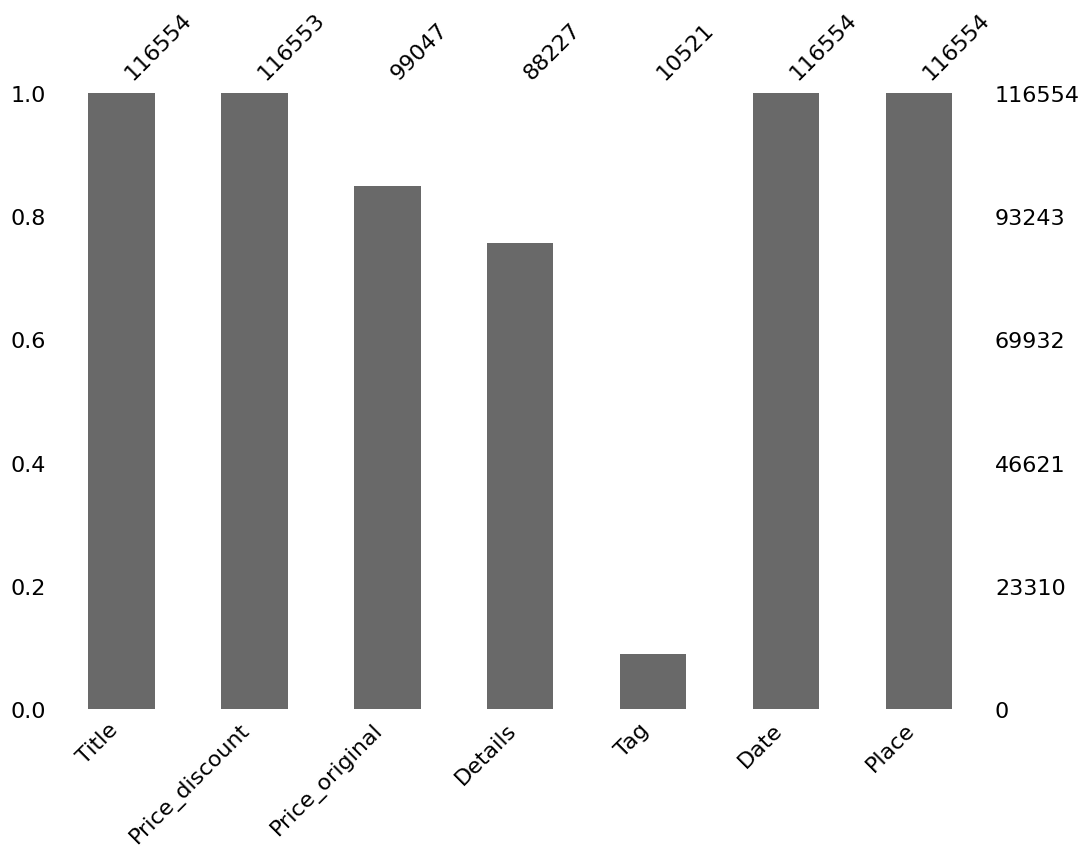

In [41]:
msno.bar(df, figsize=(12, 8))


In [42]:
df.isnull().sum()

Title                  0
Price_discount         1
Price_original     17507
Details            28327
Tag               106033
Date                   0
Place                  0
dtype: int64

In [43]:
df

,Title,Price_discount,Price_original,Details,Tag,Date,Place
0,Onion 1 kg (Pyaz),â¹ 40,â¹ 50,NaN,NaN,20240117,Bengaluru
1,Desi Tomato (Tamatar),â¹ 19,â¹ 25,NaN,NaN,20240117,Bengaluru
2,Red Carrot (Gajar),â¹ 15,â¹ 20,500 g,NaN,20240117,Bengaluru
3,Ginger (Adrak),â¹ 37,â¹ 49,200 g,NaN,20240117,Bengaluru
4,Green Chilli (Hari Mirch),â¹ 11,â¹ 14,100 g,NaN,20240117,Bengaluru
...,...,...,...,...,...,...,...
116549,151 Interior Dehumidifier (Rose),â¹299,NaN,225 g,NaN,20240201,Mumbai
116550,151 Interior Dehumidifier with Air Freshener,â¹299,NaN,225 g,NaN,20240201,Mumbai
116551,151 Interior Dehumidifier (Lemon),â¹299,NaN,225 g,NaN,20240201,Mumbai
116552,151 Interior Dehumidifier (Vanilla),â¹299,NaN,225 g,NaN,20240201,Mumbai


<Axes: >

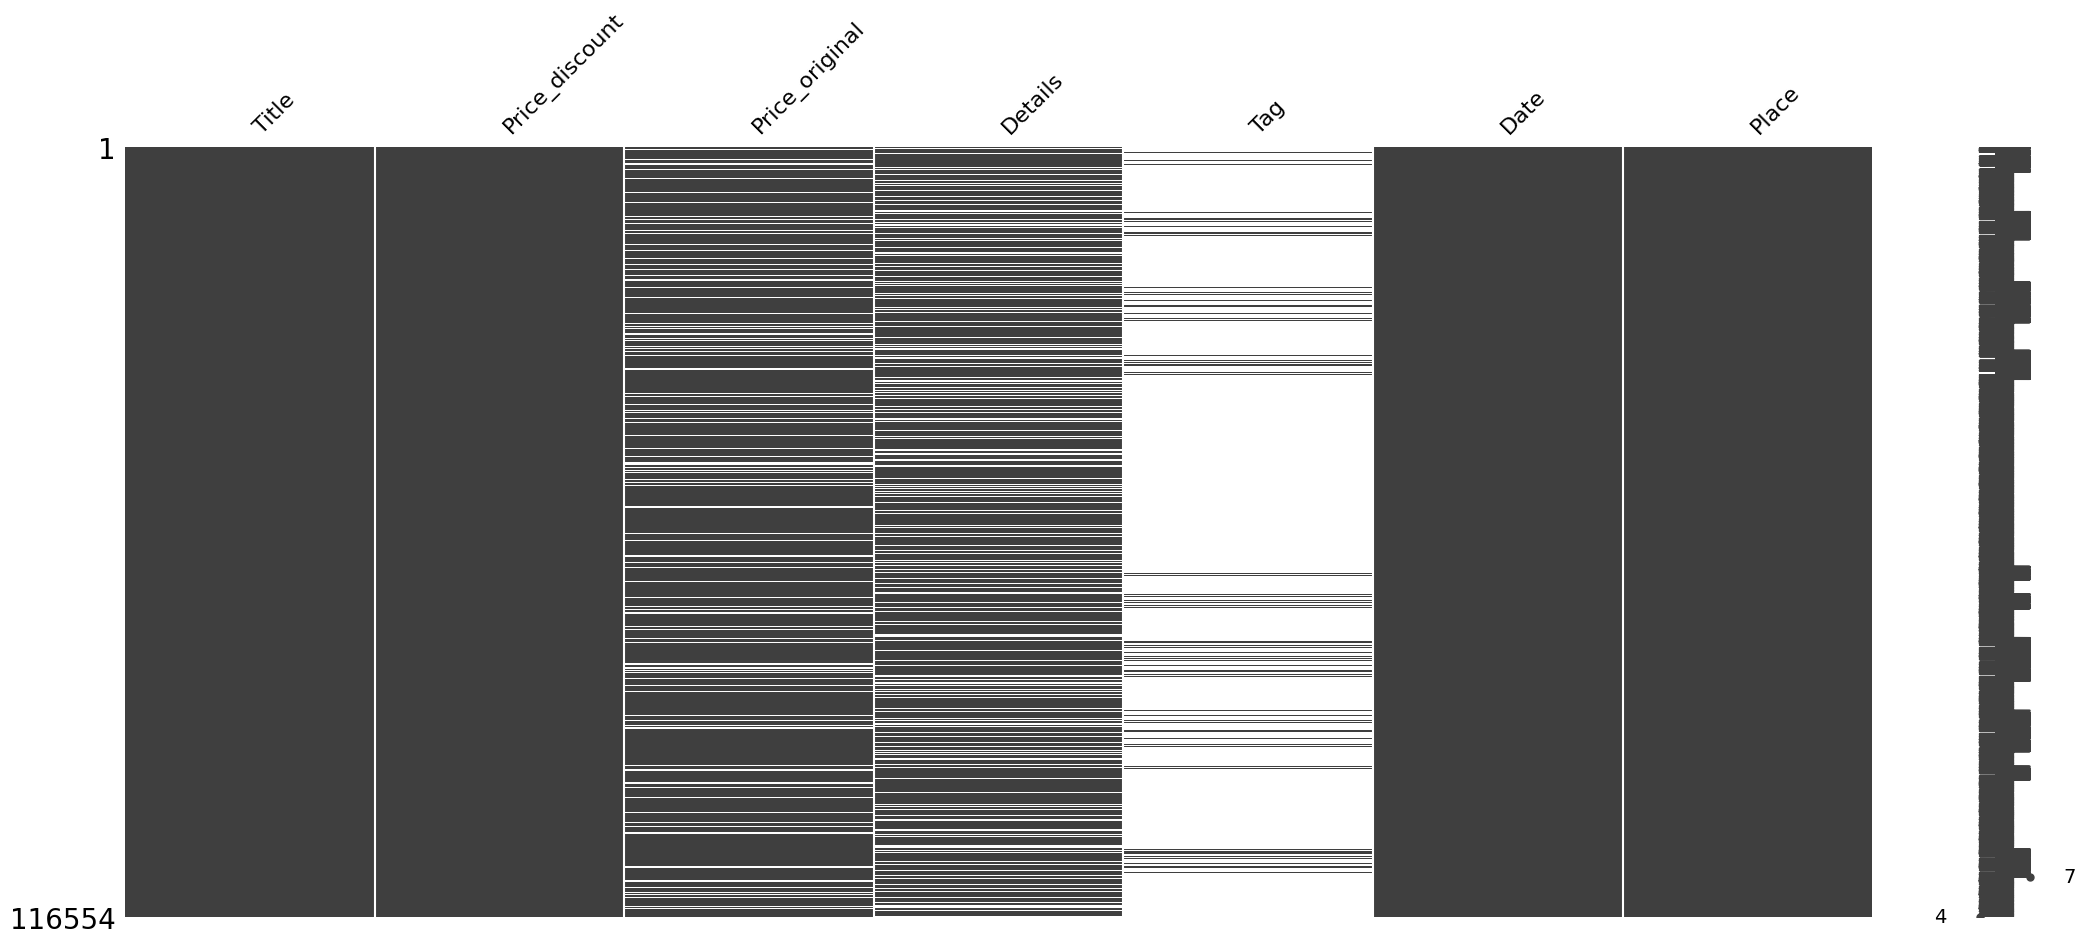

In [44]:
msno.matrix(df)

# Dirty Data (Quality issues) 

## 1. Make Price_discount and Price_original into proper format 


In [45]:
df[['Price_discount', 'Price_original']].sample(7)

,Price_discount,Price_original
25098,â¹ 216,â¹ 240
47381,â¹1199,â¹1999
77755,â¹ 129,â¹ 199
82727,â¹818,â¹1100
70348,â¹ 245,â¹ 258
62503,â¹140,â¹150
41235,â¹623,â¹635


In [46]:
import numpy as np

def clean_currency(x):
    if isinstance(x, str): 
        x = x.replace('â¹', '') 
        x = x.replace(',', '').strip()  
        if x.lower() == 'nan' or x == '':  
            return np.nan
        try:
            return float(x) 
        except ValueError:
            return np.nan  
    return x 


In [47]:
df['Price_discount'] = df['Price_discount'].apply(clean_currency)
df['Price_original'] = df['Price_original'].apply(clean_currency)


## 2. Price_discount and Price_original change the datatype into int64 ()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116554 entries, 0 to 116553
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Title           116554 non-null  object 
 1   Price_discount  116553 non-null  float64
 2   Price_original  99047 non-null   float64
 3   Details         88227 non-null   object 
 4   Tag             10521 non-null   object 
 5   Date            116554 non-null  int64  
 6   Place           116554 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ MB


In [49]:
df.sample(3)

,Title,Price_discount,Price_original,Details,Tag,Date,Place
6625,Praakritik Cold Pressed Organic Sesame Oil,381.0,495.0,500 ml,NaN,20240117,Kolkata
75779,My First 5 Minutes Fairy Tales Jack And The Be...,69.0,79.0,Wonder House Books,Out of Stock,20240125,Bengaluru
4250,Saffron Chin Chin Hakka Noodles,120.0,NaN,600 g,NaN,20240117,Delhi


## 3. change the Date Colum into daytime datatype

In [50]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116554 entries, 0 to 116553
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Title           116554 non-null  object        
 1   Price_discount  116553 non-null  float64       
 2   Price_original  99047 non-null   float64       
 3   Details         88227 non-null   object        
 4   Tag             10521 non-null   object        
 5   Date            116554 non-null  datetime64[ns]
 6   Place           116554 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.2+ MB


In [52]:
df.sample(8)

,Title,Price_discount,Price_original,Details,Tag,Date,Place
5419,"Vega Blooming Air Hair Dryer (Pink & White, 10...",699.0,999.0,NaN,NaN,2024-01-17,Delhi
13292,Animal Fun Reusable Sticker Book For Children,197.0,299.0,Wonder House Books,NaN,2024-01-18,Chennai
28916,Pringles Sour Cream & Onion Potato Chips (134 g),112.0,170.0,134 g,NaN,2024-01-19,Mumbai
113373,Fortune Xpert Pro Immunity Edible Oil,123.0,150.0,1 l,NaN,2024-02-01,Kolkata
47098,Figaro Extra Virgin Olive Oil,1372.0,1999.0,1 l,NaN,2024-01-22,Delhi
9687,Godrej Aer Power Pocket - Sea Breeze Room Fres...,60.0,NaN,10 g,NaN,2024-01-17,Mumbai
53690,Organic Tattva Organic Mustard Oil,242.0,285.0,1 l,NaN,2024-01-23,Bengaluru
7081,My First 1000 Words,179.0,299.0,Wonder House Books Editorial Team,NaN,2024-01-17,Kolkata


# Questions

## Title (Product Name):



### What are the top-selling products based on the frequency of listings?


In [53]:
df.groupby(['Title'], as_index=False)['Price_original'].sum().sort_values(by='Price_original', ascending=False).head(10)

,Title,Price_original
639,Dyson Cool Gen1 Air Purifier (50 W),1875300.0
2384,"Xiaomi 4 lite Air Purifier (â33 W, AC-M17-SC)",674955.0
1335,Morphy Richards 9 Fin Oil Filled Room Heater (...,657953.0
207,Bajaj New Shakti Neo 15L Storage Water Heater ...,618050.0
1941,Satisfyer Love Triangle Personal Massager By B...,569950.0
545,Del Monte Extra Light Olive Oil,512615.0
326,Borges Olive Oil,510800.0
164,B Swish Bgood Personal Massager By Besharam,499950.0
68,"Agaro Ace Wet and Dry Vacuum Cleaner (Black, 1...",469953.0
898,Hot Octopuss Amo Classic Bullet Vibe Personal ...,439950.0


### Which product titles are most associated with high or low discounts?


In [54]:
df.groupby(['Title'], as_index=False)['Price_discount'].sum().sort_values(by='Price_discount', ascending=False).head(5)

,Title,Price_discount
639,Dyson Cool Gen1 Air Purifier (50 W),1546253.0
2384,"Xiaomi 4 lite Air Purifier (â33 W, AC-M17-SC)",494955.0
1941,Satisfyer Love Triangle Personal Massager By B...,451945.0
326,Borges Olive Oil,379503.0
545,Del Monte Extra Light Olive Oil,370110.0


In [55]:
df.groupby(['Title'], as_index=False)['Price_discount'].sum().sort_values(by='Price_discount', ascending=False).tail(5)

,Title,Price_discount
500,Cowpea Beans (Lobia Phali),75.0
167,BRB Classic Salted Rice Popped Chips - Pack of 2,72.0
2453,ï»¿MasterChow Instant Cup Noodles (Chowmein Fl...,62.0
2466,ï»¿Yu Zingy Cheese Instant Cup Noodles (80 g),49.0
2441,"ï»¿""Philips 50 Watts Hair Straightener (With K...",0.0


## Price_discount:


### What is the average discount offered across different products?


In [56]:
df.groupby(['Title'], as_index=False)['Price_discount'].apply(np.mean).sort_values(by='Price_discount', ascending=False).head(10)

,Title,Price_discount
639,Dyson Cool Gen1 Air Purifier (50 W),32899.000000
87,Airveda Air Quality Monitor (10 W),11999.500000
88,Airveda Airveda Sky - PM2.5 PM10 App-Enabled A...,10999.000000
2384,"Xiaomi 4 lite Air Purifier (â33 W, AC-M17-SC)",10999.000000
1941,Satisfyer Love Triangle Personal Massager By B...,8217.181818
1696,Philips Rapid Air Fryer (Black),7299.000000
1335,Morphy Richards 9 Fin Oil Filled Room Heater (...,6999.000000
164,B Swish Bgood Personal Massager By Besharam,6635.363636
68,"Agaro Ace Wet and Dry Vacuum Cleaner (Black, 1...",5999.000000
207,Bajaj New Shakti Neo 15L Storage Water Heater ...,5999.000000


### Are there any seasonal trends in discount percentages over time?

In [57]:
df['Month'] = df['Date'].dt.month

In [58]:
# Create a 'Season' column based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

In [59]:
df.groupby(['Season'])['Price_discount'].mean()

Season
Winter    423.234374
Name: Price_discount, dtype: float64

In [60]:
df.drop(columns={'Month', 'Season'}, inplace=True)

### Which products have the highest or lowest average discount?


In [61]:
highest = df.groupby(['Title'], as_index=False)['Price_discount'].sum().sort_values(by='Price_discount', ascending=False).head(1)
lowest = df.groupby(['Title'], as_index=False)['Price_discount'].sum().sort_values(by='Price_discount', ascending=False).tail(1)

print("Title with the Highest Total Discount:")
print(highest)

print("\nTitle with the Lowest Total Discount:")
print(lowest)

Title with the Highest Total Discount:
                                   Title  Price_discount
639  Dyson Cool Gen1 Air Purifier (50 W)       1546253.0

Title with the Lowest Total Discount:
                                                  Title  Price_discount
2441  ï»¿"Philips 50 Watts Hair Straightener (With K...             0.0


## Price_original:


### How does the original price distribution look across all products?


In [62]:
d1 = df.groupby(['Title'], as_index=False)['Price_original'].sum().sort_values(by='Price_original', ascending=False)
d1

,Title,Price_original
639,Dyson Cool Gen1 Air Purifier (50 W),1875300.0
2384,"Xiaomi 4 lite Air Purifier (â33 W, AC-M17-SC)",674955.0
1335,Morphy Richards 9 Fin Oil Filled Room Heater (...,657953.0
207,Bajaj New Shakti Neo 15L Storage Water Heater ...,618050.0
1941,Satisfyer Love Triangle Personal Massager By B...,569950.0
...,...,...
1348,Mother Dairy Full Cream Fresh Milk,0.0
1347,Mother Dairy FIT Life Homogenized Double Toned...,0.0
1346,Mother Dairy Double Trouble Ice Cream Stick,0.0
1343,Mother Dairy Cow Fresh Milk,0.0


In [63]:
# Filter rows where 'Price_original' is equal to 0.0
d1[d1['Price_original'] == 0.0]

,Title,Price_original
2347,WickedGud Masala Instant Noodles,0.0
2463,ï»¿Samyang Ramen Instant Noodles - Kimchi,0.0
2390,Yakult Probiotic Health Drink,0.0
2253,Twinings Earl Grey Green Tea Bags,0.0
2254,Twinings Mint Green Tea Bags,0.0
...,...,...
1348,Mother Dairy Full Cream Fresh Milk,0.0
1347,Mother Dairy FIT Life Homogenized Double Toned...,0.0
1346,Mother Dairy Double Trouble Ice Cream Stick,0.0
1343,Mother Dairy Cow Fresh Milk,0.0


### Is there a significant difference in sales for high-priced vs. low-priced products?

In [64]:
df_clean = df.dropna(subset=['Price_original'])
median_price = df_clean['Price_original'].median()
df_clean['Price_Category'] = np.where(df_clean['Price_original'] > median_price, \
                                                'High-Priced', 'Low-Priced')

sales_proxy = df_clean.groupby('Price_Category').size().reset_index(name='Count')
sales_proxy.style.background_gradient(cmap='RdPu')

,Price_Category,Count
0,High-Priced,47554
1,Low-Priced,51493


### What is the price range for different categories of products ?


#### Based on Price Original

In [65]:
df_clean = df.dropna(subset=['Price_original', 'Tag'])

price_ranges = df_clean.groupby('Tag').agg(
    min_price=('Price_original', 'min'),
    max_price=('Price_original', 'max')
).reset_index()

price_ranges['price_range'] = price_ranges['max_price'] - price_ranges['min_price']


price_ranges


,Tag,min_price,max_price,price_range
0,Out of Stock,15.0,14999.0,14984.0


#### Based on Price discount

In [66]:
df_clean = df.dropna(subset=['Price_discount', 'Tag'])

price_ranges = df_clean.groupby('Tag').agg(
    min_price=('Price_discount', 'min'),
    max_price=('Price_discount', 'max')
).reset_index()

price_ranges['price_range'] = price_ranges['max_price'] - price_ranges['min_price']


price_ranges


,Tag,min_price,max_price,price_range
0,Out of Stock,12.0,11399.0,11387.0


## Details:

### What are the most common product features mentioned in the details column?

In [67]:
df.groupby(['Title', 'Details'])['Details'].count().sort_values( ascending=False).head(25)

Title                                                   Details                              
Pansari Kacchi Ghani Mustard Oil                        1 l                                      110
Fortune Premium Kachi Ghani Pure Mustard Oil            1 l                                      110
Emami Healthy & Tasty Kachi Ghani Mustard Oil           1 l                                      109
Organic India Organic Mustard Oil, (Kachi Ghani)        1 l                                      102
Anveshan Wood Cold Pressed Groundnut Oil                1 l                                      101
Natureland Organic Mustard Oil, Cold Pressed            1 l                                      101
Chemist At Play Aqua Unisex Under Arm Roll-On           40 ml                                    100
Anveshan Wood Cold Pressed Mustard Oil                  1 l                                       96
Salad Box - Hydroponically Grown                        1 box                                     

## Place:

### Which regions or places have the highest sales volume?

In [68]:
df.groupby(['Place'])['Price_discount'].sum().sort_values( ascending=False).head(25)

Place
Kolkata      10080683.0
Mumbai       10001990.0
Delhi         9805474.0
Bengaluru     9797389.0
Chennai       9643700.0
Name: Price_discount, dtype: float64

### How do discount trends vary by region?

In [69]:
df.groupby(['Place'])['Price_original'].sum().sort_values( ascending=False).head(25)

Place
Kolkata      13143718.0
Mumbai       12947676.0
Bengaluru    12709538.0
Delhi        12702377.0
Chennai      12541789.0
Name: Price_original, dtype: float64

### Is there a correlation between place and product pricing?

In [70]:
# No such big difference 